<a href="https://colab.research.google.com/github/AlexJunior01/Data_Science/blob/master/Titanic%3A%20Machine%20Learning%20from%20Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: First Machine Learning Model
Muitos devem conhecer a história do naufrágio do Titanic, uma tragédia que ninguém esperava por ser o navio mais moderno e bem construído da época. O ocorrido ficou marcado na mente da maioria das pessoas e ganhou ainda mais destaque com o lançamento do filme sobre o mesmo que ganhou vários prêmios no Óscar.


O desafio do Titanic é conhecido por ser um ótimo projeto para iniciantes na área de Data Science se aventurarem, provável se tornando o famoso **'Hello World'** do Data Science. Então aqui estou para me aventurar, analisar e criar uma modelo para o desafio de prever quem sobreviveria ao naufrágio.


## 1 - Definição do problema:
O naufrágio do Titanic ficou marcado na história grande parte pelo número de sobreviventes (apenas 722 de 2224 passageiros), e por ser o navio mais moderno com a fama de ser o navio "inafundável". Mais tarde foi descoberto os motivos do desastre, grande parte com falha humana (negligência do risco) e clima.

<br>

Muitos dos sobreviventes contaram com a sorte, mas será que somente a sorte foi a causa da salvação!? Ou existe um padrão por trás dos sobreviventes ao naufrágio.

<br>

O objetivo desse desafio é descobrir padrões nos dados do acidente, **encontrando variáveis** que influenciaram mais na sobrevivência e **criar um modelo** que receba como *input* informações de um passageiro e de a precisão se ele sobreviveria ao acidente ou não.

<br><br>

*A descrição completa da competição, assim como o conjunto de dados, está disponível na página do [Kaggle Titanic: Machine Learning from Disaster.](https://www.kaggle.com/c/titanic)*

## 2 - Obtenção dos dados:
Os dados do desafio estão disponíveis em [Kaggle](https://www.kaggle.com/c/titanic/data).
<br><br>

São disponibilizados três arquivos:
1. *train.csv:*
    * Informações sobre os passageiros e  se eles sobreviveram ou não ao acidente, deve ser utilizado para treinar o modelo.  
2. *test.csv:*
    * Informações sobre os passageiros porém não contém a informação sobre a sobrevivência do passageiro, deve ser usado nos testes como dados que nunca foram vistos pelo modelo.
3. *gender_submission:*
    * Um exemplo de como os dados devem ser entregues no fim do desafio.
    


In [ ]:
# Importando bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
# DataFrame que sera utilizado para treinar o modelo
train = pd.read_csv("train.csv")

# DataFrame que será usado como teste do modelo
test = pd.read_csv("test.csv")

## 3 - Exploração dos Dados:
A primeira análise a ser feita é sobre as variáveis existentes no conjunto de dados, algumas informações importantes devem ser coletadas como nome, tipo, porcentagem de dados faltantes e a presença de outliers.
<br><br>

### Descrição das Variáveis:
* **PassengerId:** Número de identificação do passageiro [chave primária];
* **Survived:** Se o passageiro sobreviveu ou não (0 = No / 1 = Yes);
* **Pclass:** Classe da passagem (1 = 1st, 2 = 2nd, 3 = 3rd);
* **Name:** Nome do passageiro;
* **Sex:** Sexo do passageiro;
* **Age:** Idade do passageiro;
* **SibSp:** Número de irmãos ou cônjuges;
* **Parch:** Número de pais ou filhos;
* **Ticket:** Número da passagem;
* **Fare:** Preço da passagem;
* **Cabin:** Cabine do passageiro;
* **Embarked:** Porto em qual embarcou (C = Cherbourg, Q = Queenstown, S = Southampton)


In [ ]:
# Tipo de cada variável no conjunto de dados
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Dados faltantes:
A variável que possui maior número de informações faltantes é **Cabin** com 77%, logo em seguido vem **Age** com quase 20%. Por fim, temos **Embarked** com apenas 2%.

Isso torna a variável **Cabin** inutilizável para a análise ou modelagem, já as outras duas é possível realizar algum método de interpolação para podermos utilizar na modelagem.

In [ ]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

### Descobrindo padrões


In [ ]:
# Estatísticas gerais
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Incluindo variáveis não numericas
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnston, Mr. Andrew G",male,347082,B96 B98,S
freq,1,577,7,4,644


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f035088ffd0>,
      dtype=object)

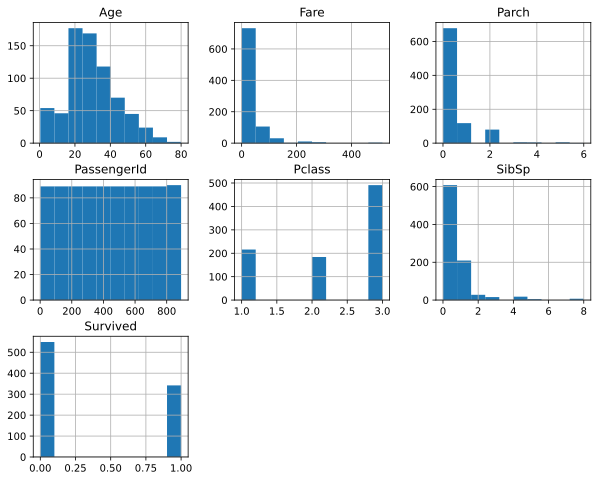

In [ ]:
# Distribuição da varíaveis
train.hist(figsize=(10, 8))

Após analisar a distribuição geral das variáveis irei ver a taxa de sobrevivência dos passageiros em relaçao a certas características:

1. Classe da passagem;
2. Porto de embarque;
3. Sexo;
4. Idade.


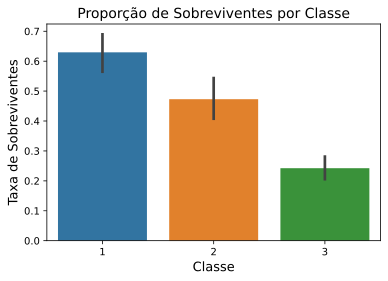

In [ ]:
# Analisando a taxa de sobrevivência em relação ao Pclass
fig = sns.barplot(x='Pclass', y='Survived', data=train)
fig.set_title('Proporção de Sobreviventes por Classe',
              fontsize=14)

fig.set_xlabel('Classe', fontsize=13)
fig.set_ylabel('Taxa de Sobreviventes', fontsize=13)
plt.show()

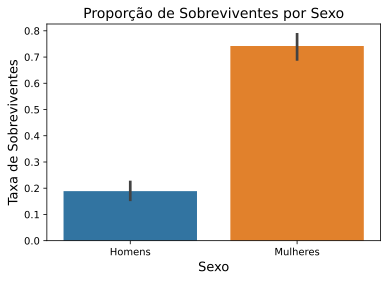

In [ ]:
# Analisando a taxa de sobrevivência em relação ao Sexo
fig = sns.barplot(x='Sex', y='Survived', data=train)
fig.set_title('Proporção de Sobreviventes por Sexo',
              fontsize=14)

fig.set_xlabel('Sexo', fontsize=13)
fig.set_ylabel('Taxa de Sobreviventes', fontsize=13)
fig.set_xticklabels(['Homens', 'Mulheres'])

plt.show()

In [ ]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

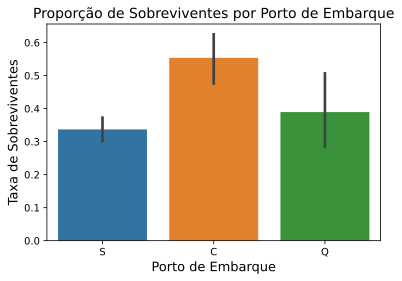

In [ ]:
# Analisando a taxa de sobrevivência em relação ao Embarked
fig = sns.barplot(x='Embarked', y='Survived', data=train)
fig.set_title('Proporção de Sobreviventes por Porto de Embarque',
              fontsize=14)

fig.set_xlabel('Porto de Embarque', fontsize=13)
fig.set_ylabel('Taxa de Sobreviventes', fontsize=13)
plt.show()

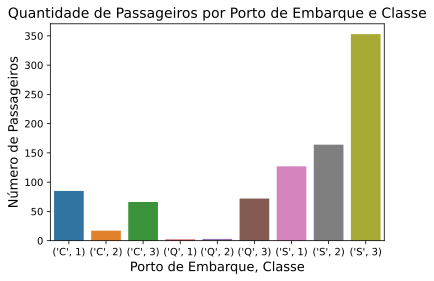

In [ ]:
# Analisando novamente o porto de embarque
gb_embarq_classe = train.groupby(['Embarked', 'Pclass'])
gb_embarq_classe = gb_embarq_classe.count()
fig = sns.barplot(data=gb_embarq_classe, x=gb_embarq_classe.index,
                  y=gb_embarq_classe['Name'])

fig.set_title('Quantidade de Passageiros por Porto de Embarque e Classe',
              fontsize=14)

fig.set_xlabel('Porto de Embarque, Classe', fontsize=13)
fig.set_ylabel('Número de Passageiros', fontsize=13)
plt.show()

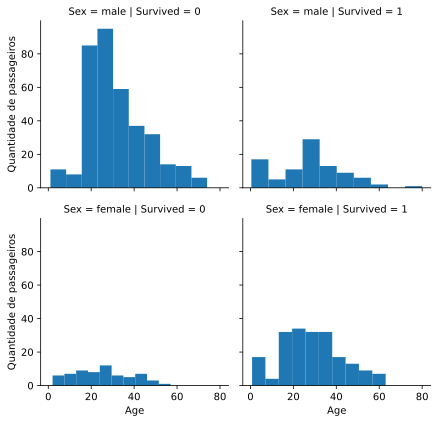

In [ ]:
# Impacto da idade na chance de sobrevivência
graficos = sns.FacetGrid(train, col="Survived", row='Sex')
fig = graficos.map(plt.hist, 'Age')
fig.set_ylabels('Quantidade de passageiros')
plt.show()

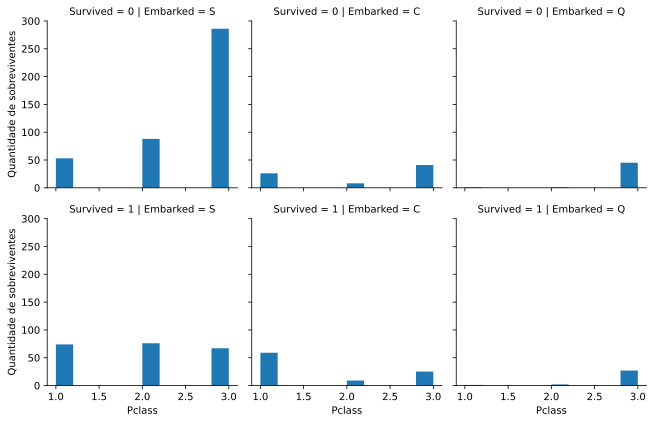

In [ ]:
# Analisando a distribuição  de sobreviventes de cada porto e classe quantitativamente
grafico = sns.FacetGrid(train, col="Embarked", row='Survived')
grafico.map(plt.hist, 'Pclass')
grafico.set_ylabels('Quantidade de sobreviventes')

Observando os gráficos acima tiramos alguma conclusões:
* O Sexo parece ser a variável que possui maior influência na sobrevivência;
* Outro característica que impactou significativamente na taxa de sobrevivência foi a classe da passagem;
* Por mais que o porto de Southampton ter possuído o maior número de embarques aparentemente o número de sobreviventes foi parecido com o dos outros portos; 
* E também a idade teve influência, apesar de ser menor do que eu esperava, tendo um impacto relevante somente na faixa de 20 a 40 anos.

## 4 - Preparação dos Dados:

## Juntando os DataSets
Muitas vezes iremos alterar a estrutura do DataFrame de treino, codificando ou alterando variáveis, para criar o modelo em cima dessa nova arquitetura. Com isso os dados de teste vão ter que possuir essa nova arquitetura também, por isso é mais fácil juntar ambos realizar as mudanças e separá-los no final. 

In [ ]:
# Salvando os índices
train_idx = train.shape[0]
test_idx = test.shape[0]

# Salvando o passengerId para a submissão no Kaggle
passenger_Id = test['PassengerId']

# Criando copia da coluna 'Survived para extrai-la durante a preparação'
target = train['Survived'].copy()
train.drop(['Survived'], axis=1, inplace=True)

# Concatenando os DataFrames
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

## Selecionando as Features:

Um dos principais serviços de um cientista de dados é descobrir quais features possuem maior relevância para a criação dos modelo de Machine Learning.

Para esse modelo, vamos desconsiderar as variáveis ['PassengerId', 'Name', 'Ticket', 'Cabin'], pois aparentemente não possuem grande impacto na sobrevivência dos passageiros

## Dados faltantes

Muito provável que dados estejam faltando, devemos analisar eles e definir o que podemos fazer.
Geralmente duas abordagens são utilizadas:
   * Excluir a linha inteira;
   * Preencher os valores (Média, Mediana, Valor acima ou abaixo, Valor mais frequente).

Muitas vezes não é vantajoso excluir uma linha inteira, então sempre que possível devemos tentar preencher o valor.

In [ ]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df_merged.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
df_merged.describe(include=['O'])

,Sex,Embarked
count,1309,1307
unique,2,3
top,male,S
freq,843,914


Para a tarifa e a idade colocarei o valor da mediana e para o porto de embarque colocarei o mais frequente.

In [ ]:
mediana_idade = df_merged['Age'].median()
df_merged['Age'].fillna(mediana_idade, inplace=True)

mediana_tarifa = df_merged['Fare'].median()
df_merged['Fare'].fillna(mediana_tarifa, inplace=True)

porto_frequente = df_merged['Embarked'].sort_values()[0]
df_merged['Embarked'].fillna(porto_frequente, inplace=True)

## Preparando as variáveis

Modelos matemáticos precisam de variáveis numéricas, logo nosso próximo passo é transformar as variáveis categóricas em numéricas.
* Para a variável *'Sex'* mapearemos os valores `{'male': 0, 'female': 1}`;
* Já para a variável 'Embarked' aplicarei o conceito de variáveis dummies¹;

*obs: 1 - variáveis dummies são variáveis que assumem valores 0 ou 1, para a substituição de variáveis categóricas é criado uma coluna extra para cada possibilidade e preenchido com 1 na categoria da linha e 0 nas extras*

In [ ]:
# Estado do DataFrame antes da alteração
df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
# Mapeando os valores em relação ao sexo
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# Criando um DataFrame com as variáveis dummies
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')

df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop(['Embarked'], axis=1, inplace=True)
df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


## Recuperação dos datasets

Agora que acabamos de alterar a arquitetura do Data Set vamos restaurar a versão original, com isso ambos já estão prontos para serem utilizados. Caso não tivéssemos unido os Data Set teríamos que fazer o mesmo procedimento para o Data Set de teste.

In [ ]:
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

## 5 - Criação do Modelo:

Chegamos na parte que para mim parecia ser a mais complicada, por existir um grande breu, a criação do modelo de *Machine Learning*.

Mas com o curso liberado pelo [Kaggle: Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) clareou minha mente e mostrou que com algumas bibliotecas e poucas linhas podemos criar alguns modelos básicos, o que facilita muito para quem está começando.

Nesse projeto utilizarei dois modelos:
* Random Forest Classifier;
* Decision Tree Classifier.

Ambos forem explicados no curso que mencionei acima, então recomendo fortemente que se estiverem começando na área que façam ele.

In [ ]:
# Importanto os modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Criando e treinando o primeiro modelo
dt_model = DecisionTreeClassifier(random_state=1, max_depth=5)
dt_model.fit(train, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Fazendo as predições
y_pred_dt = dt_model.predict(test)

# Colocando no modelo pedido pelo Kaggle para submissão
submission = pd.DataFrame({
    "PassengerId": passenger_Id,
    "Survived": y_pred_dt
})

# Gerando o arquivo 
submission.to_csv('./submission_dt.csv', index=False)

O modelo de Árvore de Decisão ficou com 77,51%, o que é uma pontuação boa para um primeiro modelo. 

In [ ]:
# criando e treinando segundo modelo
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_model.fit(train, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Fazendo as predições
y_pred_rf = rf_model.predict(test)

# Colocando no modelo pedido pelo Kaggle para submissão
submission = pd.DataFrame({
    'PassengerId': passenger_Id,
    'Survived': y_pred_rf
})

# Gerando o arquivo 
submission.to_csv('./submission_rf.csv', index=False)

Já com o modelo Random Forest tivemos uma pequeno ganho de acurácia, ficando com 78,22%. Um ótimo ganho por apenas trocar de modelo.

## Eu sobreviveria ao Titanic!?

Agora que o modelo foi finalizado chegamos ao momento mais esperado, será que eu sobreviveria ao Titanic!? Vou fazer o teste colocando como preço da tarifa a mediana e com porto de embarque o mais frequente para fazer o teste.

In [ ]:
median_fare = train['Fare'].median()
alex = np.array([3, 0, 21, 0, 0, median_fare, 0, 0, 1]).reshape((1,-1))

rf_model.predict(alex)[0]

0

Bem, infelizmente meu próprio modelo indicou que eu não sobreviveria ao Titanic.

## Conclusão:

Gostei muito de fazer esse projeto e achei realmente bom para se iniciar por ele. Tive dificuldade em analisar certas variáveis e entender o que os gráficos expressavam, achando que fiz coisas bem superficiais. Mas com isso já sei que preciso melhorar e tenho um certo rumo agora além de um projeto feito.